<a href="https://colab.research.google.com/github/RobsonCrLira/QuarentenaDadosAlura/blob/master/Desafios_Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 4


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [0]:
uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)

In [201]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [202]:
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
       'Q027'],
      dtype='object', length=137)

In [203]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [332]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
#dados_notas.head()
len(dados_notas)

97270

In [205]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


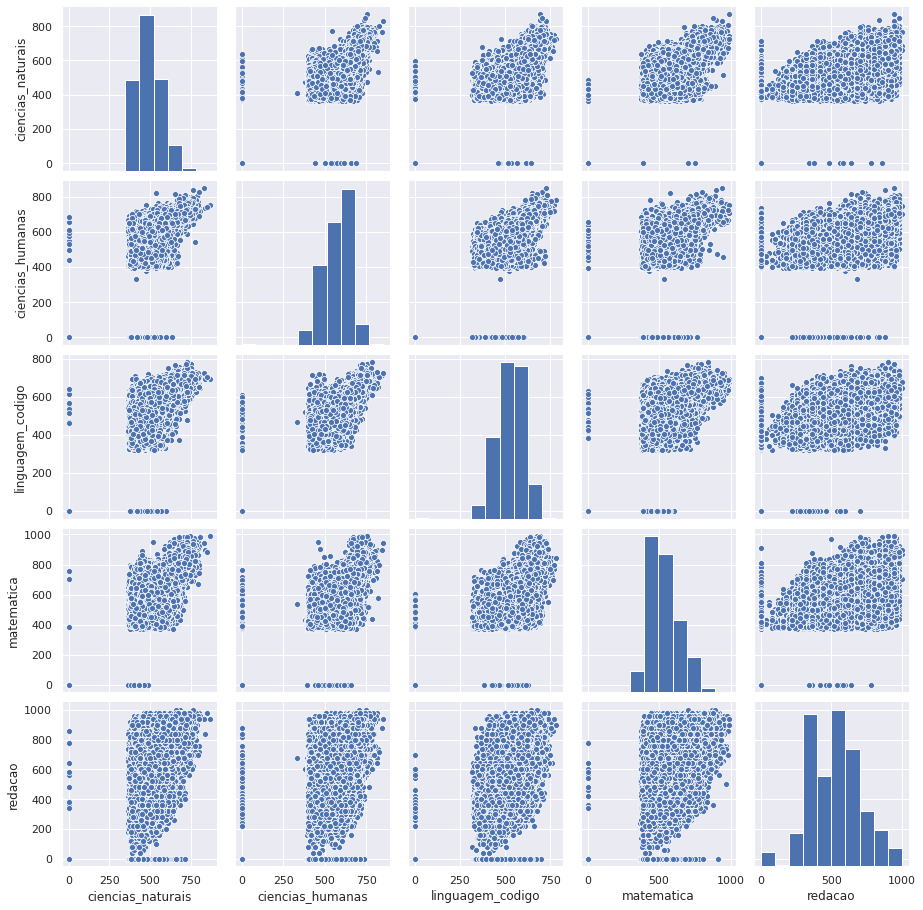

In [206]:
sns.pairplot(dados_notas)

##Desafio 1
Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas_completo = dados[colunas_de_notas].fillna(-1)

In [208]:
len(dados_notas_completo)

137844

Eu escolhi substituir por -1 pois no desafio 4 tenho q remover os que tiraram 0.


#Desafio 2
A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

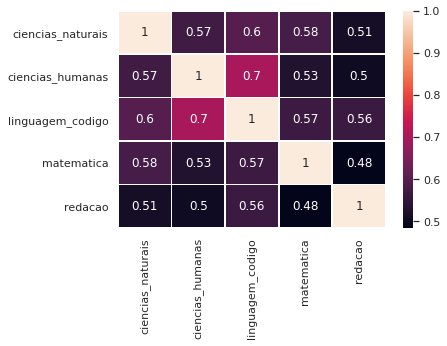

In [210]:
sns.heatmap(corr,linewidths=.8,annot=True)

#Desafio 3
Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
gabarito_colunas = ['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',
                    'TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','NU_NOTA_REDACAO']
gabarito_resposta = dados[gabarito_colunas].dropna()

In [212]:
gabarito_resposta.head()

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.00
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.00


In [0]:
def contagem_de_acertos(aluno,materia):
  respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
  gabarito = aluno.get(f'TX_GABARITO_{materia}')

  if (type(respostas) != str or type(gabarito) != str):
    return 0  
  
  return sum(a==b for a, b in zip(respostas, gabarito))

In [0]:
acertos = gabarito_resposta.copy()

acertos['CN'] = acertos.apply(contagem_de_acertos, materia='CN', axis=1)
acertos['CH'] = acertos.apply(contagem_de_acertos, materia='CH', axis=1)
acertos['LC'] = acertos.apply(contagem_de_acertos, materia='LC', axis=1)
acertos['MT'] = acertos.apply(contagem_de_acertos, materia='MT', axis=1)

In [322]:
dados_acertos.head()

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO,NU_RESPOSTAS_CORRETAS_CN,NU_RESPOSTAS_CORRETAS_CH,NU_RESPOSTAS_CORRETAS_LC,NU_RESPOSTAS_CORRETAS_MT
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00,11,27,33,22
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00,8,9,8,6
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00,7,10,11,10
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.00,11,9,15,8
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.00,8,12,15,13


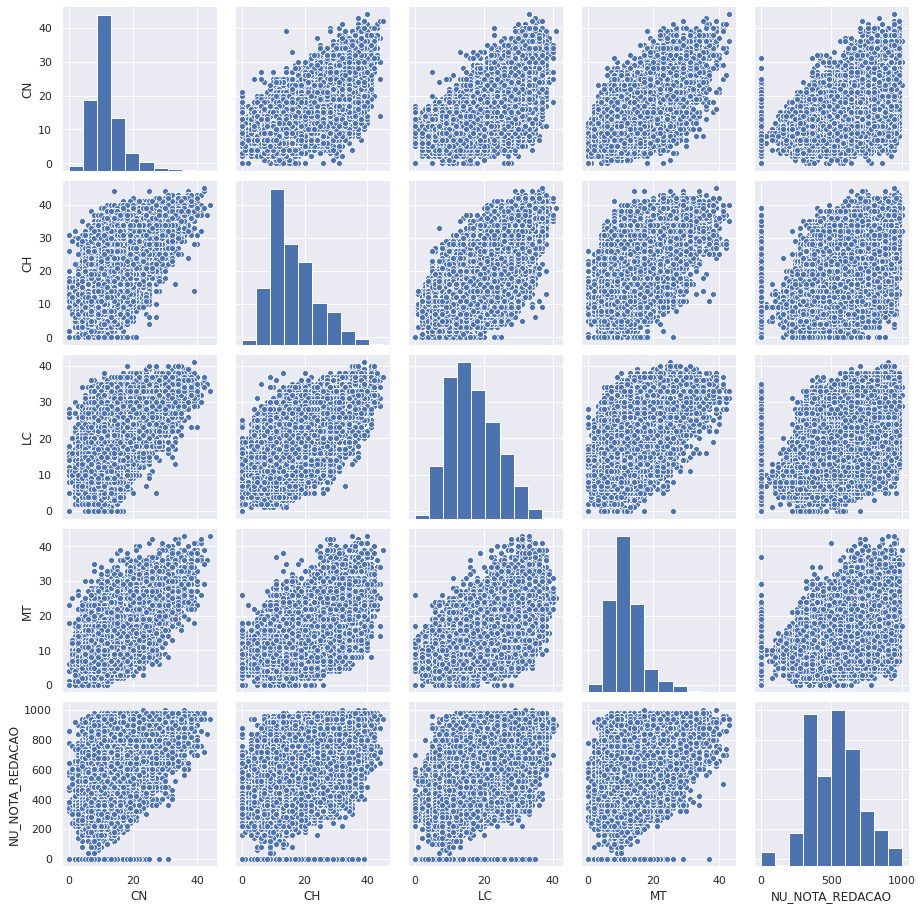

In [325]:
sns.pairplot(acertos[['CN', 'CH', 'LC', 'MT', 'NU_NOTA_REDACAO']])

#Desafio 4
Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
dados_sem_zeros = dados[colunas_de_notas].replace(0,np.nan).dropna()

In [339]:
#Este é o Dataframe 
len(dados_sem_zeros)

95181

In [340]:
dados_sem_zeros.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.58,0.60,0.58,0.53
NU_NOTA_CH,0.58,1.00,0.70,0.54,0.52
NU_NOTA_LC,0.60,0.70,1.00,0.57,0.57
NU_NOTA_MT,0.58,0.54,0.57,1.00,0.50
NU_NOTA_REDACAO,0.53,0.52,0.57,0.50,1.00


#Desafio 5
Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

#Desafio 6

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

#Aula 5



In [219]:
x = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [220]:
y = dados_notas['linguagem_codigo']
y.head()

1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagem_codigo, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

In [222]:
np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [223]:
modelo = LinearSVR()
modelo.fit(x_treino,y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [224]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

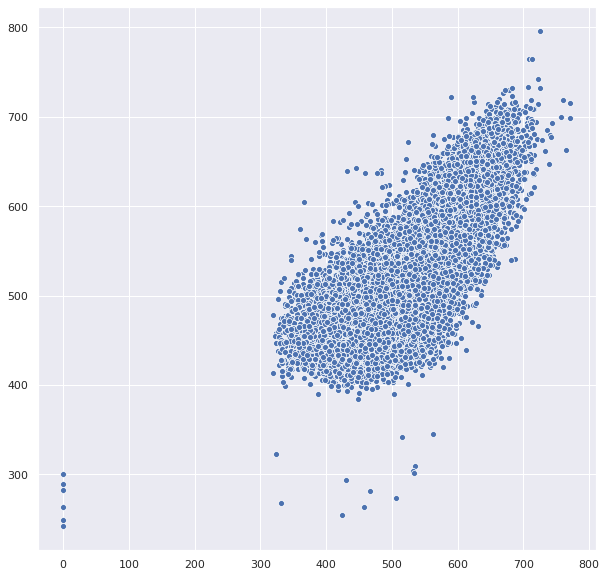

In [225]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguagem)

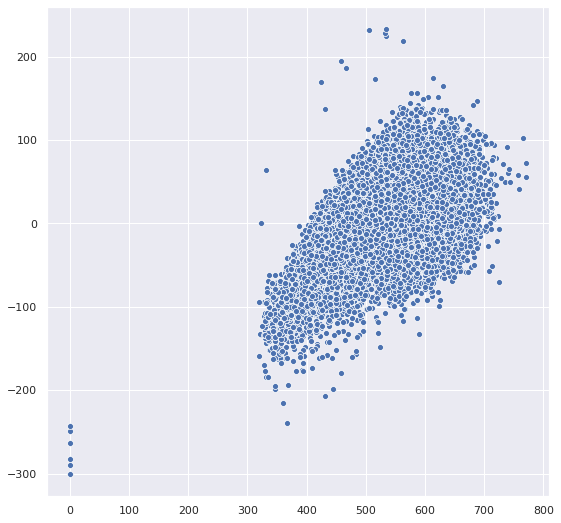

In [226]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=y_teste.values - predicoes_notas_linguagem)
#y_teste.values são os dados reais e predicoes_notas_linguaguem é a predição que eu fiz(no caso Guilherme Silveira)

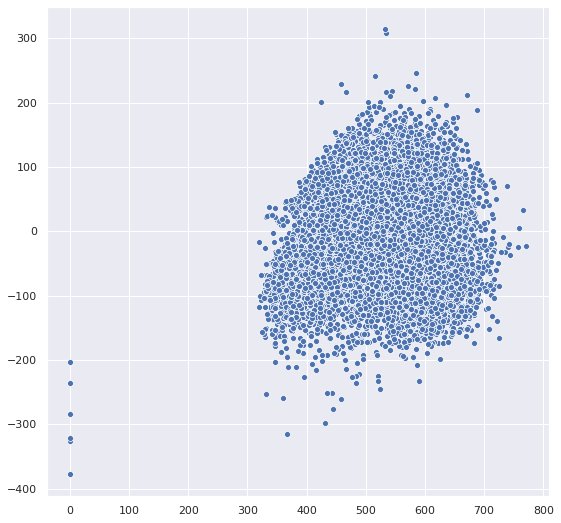

In [227]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=y_teste.values - x_teste.mean(axis=1))
# predição do Guilherme Silveira TOSCA. Dummy!

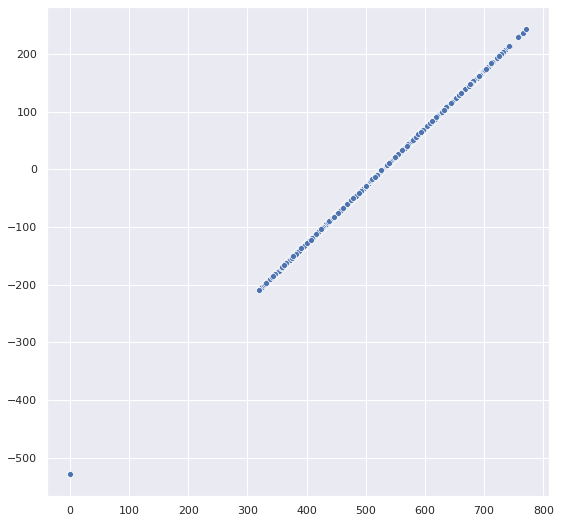

In [228]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=y_teste.values - y_treino.mean())
# predição do paulo TOSCA. Dummy!

In [0]:
from sklearn.svm import SVR

In [0]:
modelo = SVR()

In [231]:
modelo.fit(x_treino,y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

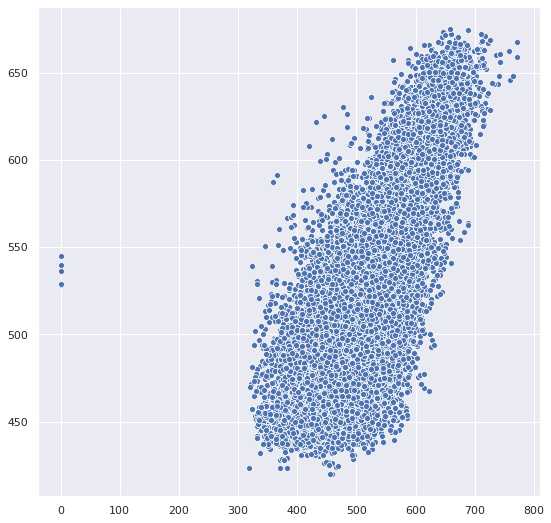

In [232]:
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguagem)

In [233]:
predicoes_notas_linguagem

array([484.37397236, 556.56555528, 482.28246262, ..., 504.79164589,
       590.29001711, 513.9686468 ])

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
modelo = DecisionTreeRegressor()

In [236]:
modelo.fit(x_treino,y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

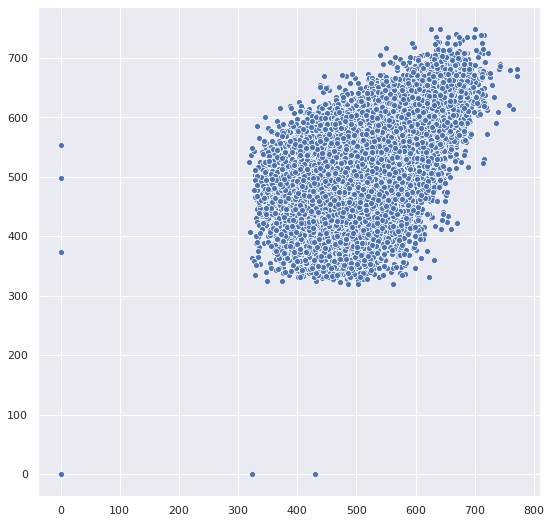

In [237]:
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguagem)

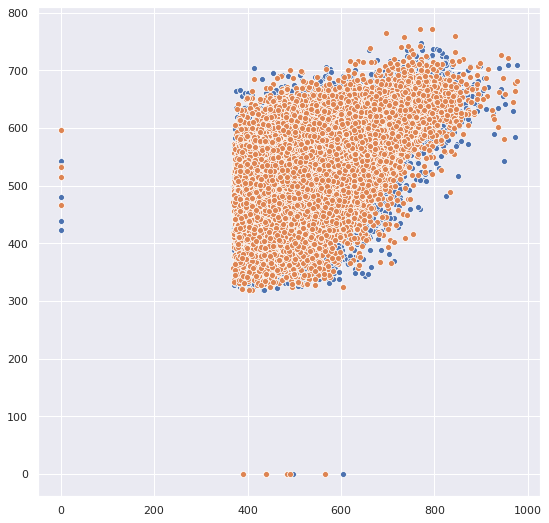

In [238]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values,y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

In [240]:
mean_squared_error(y_teste,predicoes_notas_linguagem)

4133.52

In [241]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste,dummy_predicoes)

5193.54

#Desafio 1
Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [258]:
#C = 2 e max_iter = 2500
modelo = LinearSVR(C=2,max_iter=2500)
modelo.fit(x_treino,y_treino)

predicoes_notas_linguaguem_1 = modelo.predict(x_teste)
predicoes_notas_linguaguem_1[:5]

array([482.27197136, 522.55697742, 473.94752533, 440.38334241,
       535.61090379])

In [252]:
#C = 10 e max_iter = 5000
modelo = LinearSVR(C=10,max_iter=5000)
modelo.fit(x_treino,y_treino)

predicoes_notas_linguaguem_2 = modelo.predict(x_teste)
predicoes_notas_linguaguem_2 [:5]

array([526.75162262, 590.49063296, 519.69121077, 486.77773605,
       583.73819027])

In [254]:
#C = 3 e max_iter = 2000
modelo = LinearSVR(C=3,max_iter=2000)
modelo.fit(x_treino,y_treino)

predicoes_notas_linguaguem_3 = modelo.predict(x_teste)
predicoes_notas_linguaguem_3[:5]

array([419.10414604, 472.23511267, 419.27550831, 401.26388184,
       459.7417522 ])

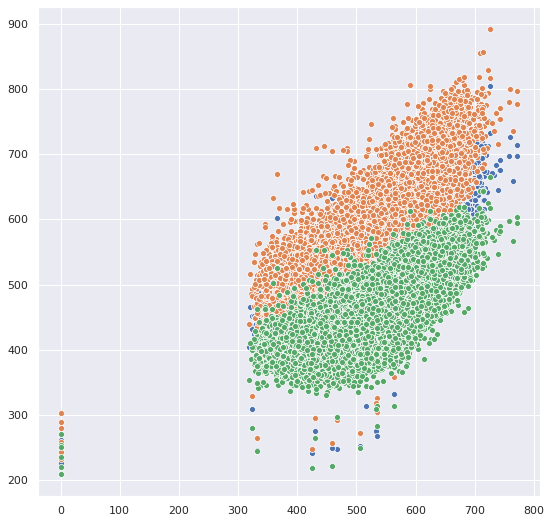

In [265]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguaguem_1)
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguaguem_2)
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguaguem_3)

#Desafio 2
Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

In [0]:
modelo_D2 = SVR()
modelo_D2.fit(x_treino,y_treino)
predicoes_notas_linguagem_D2 = modelo_D2.predict(x_teste)

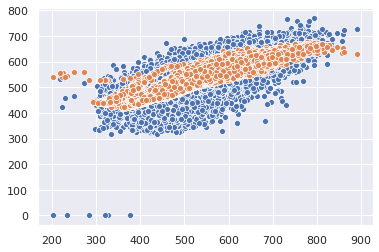

In [273]:
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)

#Desafio 3
Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [0]:
x_sem_zeros = dados_sem_zeros[colunas_de_notas].dropna()
x_sem_zeros = x_sem_zeros.drop(columns='NU_NOTA_LC')
x_sem_zeros.columns =['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']

In [307]:
y_sem_zeros = dados_sem_zeros['NU_NOTA_LC']

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: NU_NOTA_LC, Length: 97270, dtype: float64

In [0]:
x_teste_sem_zeros,x_treino_sem_zeros,y_teste_sem_zeros,y_treino_sem_zeros = train_test_split(x_sem_zeros,y_sem_zeros)

In [310]:
modelo_sem_zeros = LinearSVR(C=5,max_iter=5000)
modelo_sem_zeros.fit(x_treino_sem_zeros,y_treino_sem_zeros)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=5000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_notas_linguagem_sem_zeros = modelo.predict(x_teste_sem_zeros)

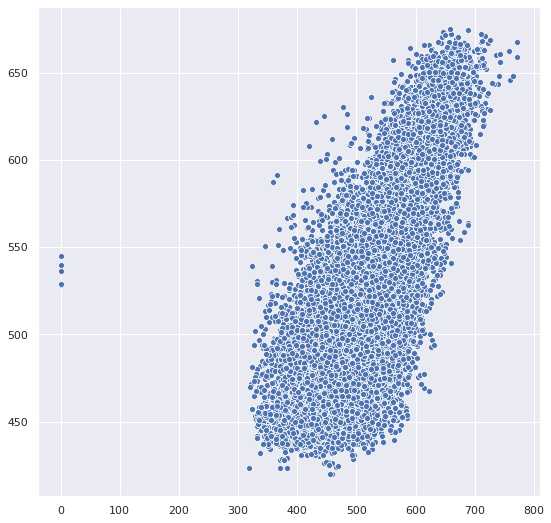

In [315]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste_sem_zeros.values,y=predicoes_notas_linguagem_sem_zeros)

In [0]:
mean_squared_error(y_teste_sem_zeros,predicoes_notas_linguagem_sem_zeros)

#Desafio 4
Interpretar tudo que foi feito e compartilhar suas conclusões

#Desafio 5
Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.